## CA2 Machine Learning

In [232]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import seaborn as sns
sns.set()

This project starts from loading the designated data into the document as a Pandas data frame. The goal for this analysis is to compare the KNN and Naive Bayes in terms of accuracy and then implement a prediction model using the Medical Appointment No Shows.csv dataset to know if a patient will show to their medical appointment. After comparing the models, we will use the most accurate to implement the prediction system. 

In [233]:
df = pd.read_csv('Medical Appointment No Shows.csv')

With the data loaded to the Jupyter Notebook, the first thing that needs to be checked is if the dataset contains null values, which is achieved by running the info() method.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Then we check and print NA values if any. 

In [235]:
print(df.isna().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [236]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The next cell shows the names of all the columns in the downloaded data frame. From this list is possible to identify a spelling mistake in the column "Handcap", which is corrected in the sequence. After correcting the name of the column we run it through the value_counts() method to see what as the values like in this column.

In [237]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [238]:
df = df.rename(columns={'Handcap': 'Handicap'})
df["Handicap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

The graph comparing the numbers for "No-show" against the values represented on the "Handicap" column show little or no influence of the latter into the results of who attends or not to their medical appointment. For this reason, the column "Handicap" will be dropped from the dataset.

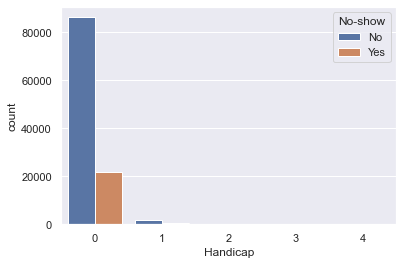

In [239]:
ax = sns.countplot(x="Handicap", hue="No-show", data=df)

In [240]:
df.drop(['Handicap'], axis=1, inplace=True)

The next feature to be analysed is the age of the patients. In the following cells, negative values for the Age were found in the dataset. Because this problem was only on a single record in the dataset, the record was assumed to be a mistake and it was deleted. The numbers over 100 for age are a bit odd, but there was no way of dismissing them as errors with confidence so they remain in the dataset.

In [241]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [242]:
df = df.drop(df[df['Age'] <= 1].index)
df['Age'].value_counts()

52     1746
49     1652
53     1651
56     1635
38     1629
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 101, dtype: int64

Now that are only valid number for the "Age" column, we can start plotting a few graphs in an attempt to find any relevant evidence, but age has a long range and it makes it difficult to visualise the association in a clear manner.

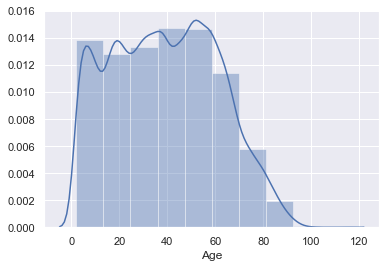

In [243]:
sns.distplot(df['Age'], bins = 10)

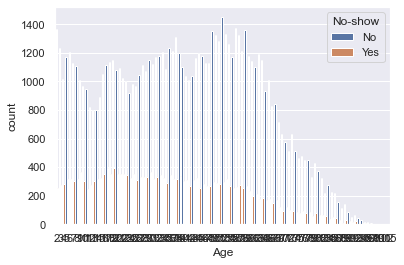

In [244]:
ax = sns.countplot(x="Age", hue="No-show", data=df)

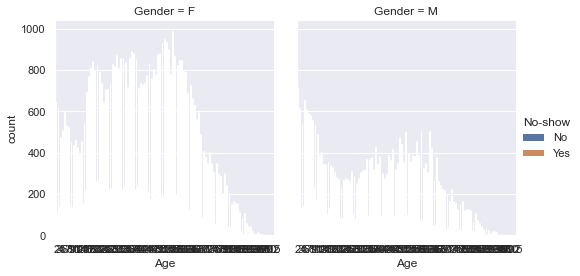

In [245]:
g = sns.catplot(x="Age", hue="No-show", col="Gender",
                data=df, kind="count",
                height=4, aspect=.9);

The "Gender" is the next feature to be checked. From the valu_counts() method we can see that the number of females is almost twice as the number of males in this data. And this characteristic is also visible in the barplot below. Finally, the values for the "Gender" column will be changed to 0 for female and 1 for male.  

In [246]:
df["Gender"].value_counts()

F    69030
M    35684
Name: Gender, dtype: int64

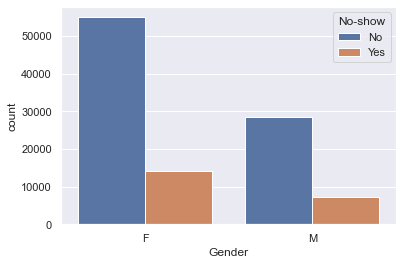

In [247]:
ax = sns.countplot(x="Gender", hue="No-show", data=df)

In [248]:
df["Gender"]=df["Gender"].replace(to_replace="M", value=1)
df["Gender"]=df["Gender"].replace(to_replace="F", value=0)

Next, we need to count and see how many no-shows we have on the dataset and the percentage of the people who did not attend to their appointment. We achieve that by saving the result of the method value_counts() to a variable and divide the amount of "Yes" values by the sum of all values multiplied by 100. This gives back a result around 20% of no-shows.

In [249]:
count_no_show = df["No-show"].value_counts()
print(count_no_show)

ratio_no_show = count_no_show["Yes"]/ count_no_show.sum() * 100
print("Overall percentage of people who didn't show up to their appointment is ",ratio_no_show )

No     83449
Yes    21265
Name: No-show, dtype: int64
Overall percentage of people who didn't show up to their appointment is  20.3076952460989


Now the "No-show" column inside the original data frame needs encoded into numerical values for further exploration. 

In [250]:
def encode(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0
df['No-show'] = df[['No-show']].applymap(encode)
df['No-show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 104714, dtype: int64

The above column of the main data frame has now numeric values, which can be counted into showing the total number of appointments missed by each patient using "PatientID" to group the records. In sequence we will sort the values "Num_App_Missed" to check the top 10 largest number os missed appointments per patient.

In [251]:
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())
df.sort_values(['Num_App_Missed'], ascending=False).head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Num_App_Missed
95351,1.421987e+12,5757667,1,2016-06-01T09:41:24Z,2016-06-01T00:00:00Z,9,SÃO BENEDITO,0,0,0,0,0,1,18
95346,1.421987e+12,5785684,1,2016-06-08T07:32:52Z,2016-06-08T00:00:00Z,9,SÃO BENEDITO,0,0,0,0,0,1,17
95350,5.635135e+14,5757671,1,2016-06-01T09:41:24Z,2016-06-01T00:00:00Z,9,SÃO JOSÉ,1,0,0,0,0,1,16
95298,1.421987e+12,5761188,1,2016-06-01T16:38:28Z,2016-06-01T00:00:00Z,9,SÃO BENEDITO,0,0,0,0,0,1,16
95294,1.421987e+12,5785809,1,2016-06-08T07:41:10Z,2016-06-08T00:00:00Z,9,SÃO BENEDITO,0,0,0,0,0,1,15
95345,5.635135e+14,5785685,1,2016-06-08T07:32:52Z,2016-06-08T00:00:00Z,9,SÃO JOSÉ,1,0,0,0,0,1,15
95340,5.587790e+12,5757669,1,2016-06-01T09:41:24Z,2016-06-01T00:00:00Z,14,SANTA TEREZA,0,0,0,0,0,1,15
95289,5.587790e+12,5761190,1,2016-06-01T16:38:28Z,2016-06-01T00:00:00Z,14,SANTA TEREZA,0,0,0,0,0,1,14
95297,5.635135e+14,5761192,1,2016-06-01T16:38:28Z,2016-06-01T00:00:00Z,9,SÃO JOSÉ,1,0,0,0,0,1,14
95339,5.811973e+14,5757670,0,2016-06-01T09:41:24Z,2016-06-01T00:00:00Z,7,MARIA ORTIZ,0,0,0,0,0,1,14


Something that can influence if the patient will or not show up for their appointment is how long was the period between the scheduling the appointment and the day of the of the actual medical consultation. So in order to calculate how long people waited for their appointments the columns for "ScheduledDay" and "AppointmentDay" will be transformed into datetime type so that we can subtract the "AppointmentDay" from the "ScheduledDay" and save the result to a new column called "AwaitingTime".

In [252]:
# Converts the two variables to datetime variables
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create a variable called "AwaitingTime" by subtracting the date the patient made the appointment and the date of the appointment.
df['AwaitingTime'] = (df["AppointmentDay"] - (df["ScheduledDay"])).dt.days
df['AwaitingTime']= df['AwaitingTime'].apply(lambda x: x + 1)

When passing this new column's values through the value_counts() method, negative results were found and after a search for the records containing such values discrepancies were identified in the "AppointmentDay" and "ScheduledDay" data such as the appointment day being before the day of the scheduling. For the purpose of this analysis, the records with negative results for "AwaitingTime" will be dropped.

In [253]:
df['AwaitingTime'].value_counts()

 0      35965
 2       6584
 4       5172
 1       4948
 7       4710
        ...  
 146        1
 82         1
-6          1
 139        1
 127        1
Name: AwaitingTime, Length: 131, dtype: int64

In [254]:
#df.columns
df[df['AwaitingTime'].values < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Num_App_Missed,AwaitingTime
27033,7.839273e+12,5679978,1,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,0,1,1,-1
55226,7.896294e+12,5715660,0,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,0,1,2,-1
64175,2.425226e+13,5664962,0,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,1,2,-1
71533,9.982316e+14,5686628,0,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,1,2,-6
72362,3.787482e+12,5655637,1,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,1,1,-1


In [255]:
df = df.drop(df[df['AwaitingTime'] <= 0].index)

In the next cell we will initialize a new data frame containing only the features that could influence on each record's chance to attend or not to the medical appointment. To compute the importance of each feature on the "No-show" value, we use slice to select our feature and target variables to then apply the feature_importances_ class of the Extra Trees Classifier library from sklearn. The feature importance assigns a score to each feature of the data; the higher the score, the more important or meaningful the feature is to the output variable.

[0.00628625 0.47463686 0.00716726 0.00825529 0.00367151 0.00430772
 0.00627461 0.48940049]


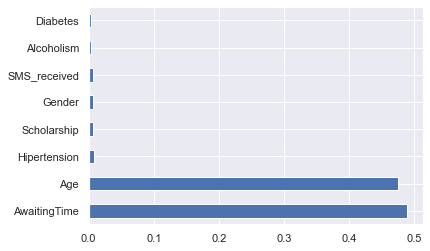

In [256]:
toplot = df[['Gender', 'Age', 'Scholarship', 'Hipertension', 
       'Diabetes', 'Alcoholism', 'SMS_received', 'AwaitingTime', 'Num_App_Missed', 'No-show']]

X = toplot.iloc[:,0:8]  
y = toplot.iloc[:,-1]   
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

The following individual plots show the counting of people of "No-show" within each feature. 

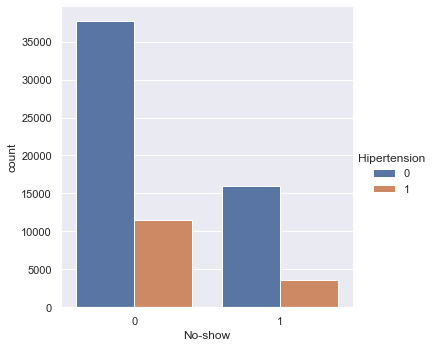

In [257]:
sns.catplot('No-show',data=df,hue='Hipertension',kind='count')

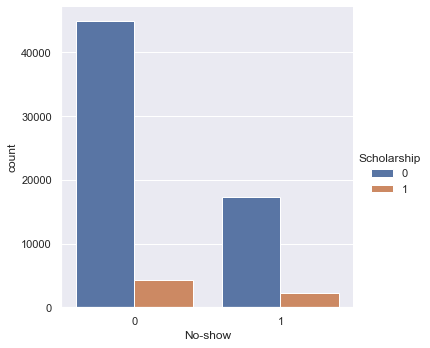

In [258]:
sns.catplot('No-show',data=df,hue='Scholarship',kind='count')

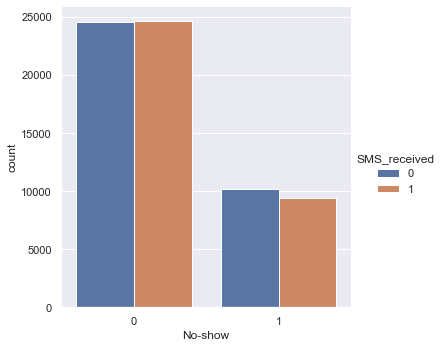

In [259]:
sns.catplot('No-show',data=df,hue='SMS_received',kind='count')

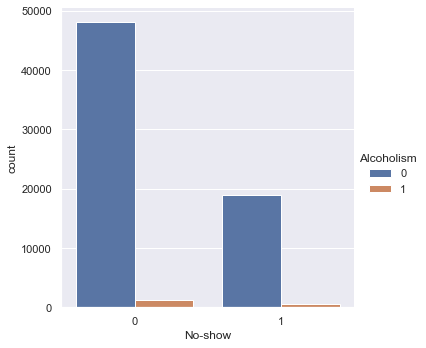

In [260]:
sns.catplot('No-show',data=df,hue='Alcoholism',kind='count')

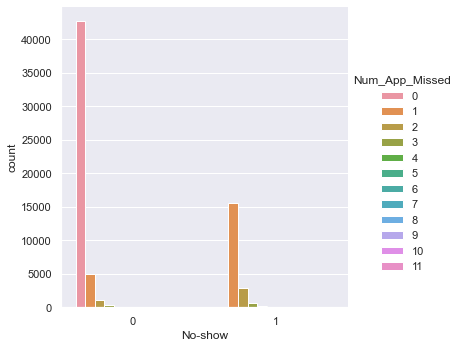

In [261]:
sns.catplot('No-show',data=df,hue='Num_App_Missed',kind='count')

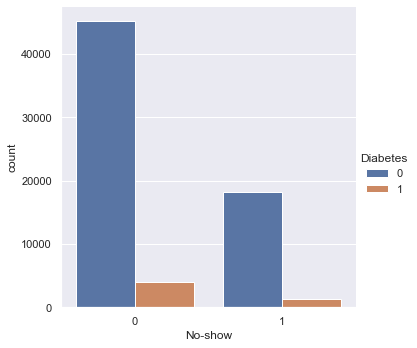

In [262]:
sns.catplot('No-show',data=df,hue='Diabetes',kind='count')

At this step we start to put together the data that will be used to train and compare the two models, KNN and Naïve Bayes, in terms of accuracy. With the dataset analysis and cleaning done, we initialize the data frames which will be the references for X and y in the model.

In [263]:
X = df[['Gender', 'Diabetes','Hipertension', 'Scholarship', 'Num_App_Missed', 'Age', 'AwaitingTime']]

In [264]:
y=df['No-show']

# Multiple Model Accuracy Comparison

To compare the two model KNN and Gaussian Naive Bayes results, we will set the train and test variables, using the train_test_split function to set aside 20 percent of the dataset to use in the validation of the model.

In [265]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

We then initialise a list of models and append the ones we are comparing to the list. 

In [266]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

When we split the data between train and test datasets, the y variable needs to have its values in the numeric type, but when running the cross_val_score method from Stratified KFold class, the data needs to be turned back into its original object types. This operation is performed using the Label Encoder class.

In [267]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

To estimate the model's accuracy, we use 10-fold stratified cross validation. This divides the dataset in 10 parts, trains in 9 and tests on 1 and repeats all train-test combinations. Stratified implies that each fold or partition of the dataset aims to have the same class distribution as the entire training data set exists. To ensure that algorithm is tested on the same splits of the training data set, we need the random state argument to a fixed number. We use the 'accuracy' metric for model assessment, which is the proportion of the amount of instances correctly predicted and is multiplied by 100 to give a percentage by the total number of instances in the dataset. The result will print the accuracy and the standard deviation for each model in this dataset. 

In [268]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.859078 (0.004451)
NB: 0.847477 (0.003540)


The code above shows that by a small difference, KNN is more accurate then the Gaussian Naive Bayes in this case. The graphic visualization of this comparison shows an overlap between the lowest value of the KNN and the highest from the Gaussian Naive Bayes.

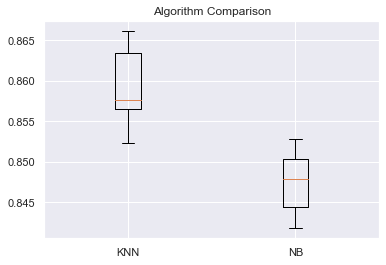

In [269]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# KNN

Based on the results from the comparison above, it was decided that the model prediction to predict the no-show in the medical appointments dataset is going to be trained using the K-nearest neighbours. Using the same variables previously created for the X and y.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

As with the previous algorithms, we need to initialize the KNN model, defining the number of neighbours used as reference and will use Euclidean distance as metric. The model will then call the fi() function do train the model. 

In [271]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

Finally, we will use the method predict() from KNN, pass the test dataset to it and save the model into a variable "prediction".

In [272]:
prediction = knn.predict(X_test)

We can now print the confusion matrix with the results followed by the classification report containing also information precision, f1-score and support.

In [273]:
print(confusion_matrix(y_test, prediction))
print('The score of the accuracy is ', accuracy_score(y_test, prediction))

[[9138  790]
 [1281 2540]]
The score of the accuracy is  0.8493708633355153


In [274]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9928
           1       0.76      0.66      0.71      3821

    accuracy                           0.85     13749
   macro avg       0.82      0.79      0.80     13749
weighted avg       0.85      0.85      0.85     13749



To check if our model works, we add a new record and pass it through the KNN model to see if that new patient will show up to their appointment or not.

In [275]:
X_validation = [[0,0,0,0,0,63,1]]
new_pred = knn.predict(X_validation)
if new_pred == 0:
    print('The patient will show up.')
if new_pred == 1:
    print('The patient will not show up.')

The patient will show up.
